## Lesson Note on Creating & Working with DateTime Objects in Pandas

### Introduction

In this lesson, we'll cover how to handle dates and times in pandas, focusing on two key concepts: `Timestamp` and `Period`. We'll explore how to create these objects, manipulate them, and apply them to real-world datasets. Time series data is ubiquitous in many fields, from economics to engineering, and mastering these concepts will help you handle such data more effectively.

### Setup

First, ensure you have the necessary libraries installed. You need pandas and statsmodels. You can install them via pip if they're not already installed:

In [24]:
#!pip install pandas statsmodels

In [25]:
import pandas as pd
import statsmodels.api as sm

### Part 1: Working with `Timestamp`

#### 1.1 Creating `Timestamp`

The `Timestamp` is pandas' equivalent of Python's `datetime` and is interchangeable with it in most cases.

In [26]:
# Creating a timestamp for January 1st, 2023
timestamp = pd.Timestamp('2023-01-01')
print(timestamp)

2023-01-01 00:00:00


#### 1.2 Using `Timestamp` in a Time Series Dataset

Let's load a time series dataset from `statsmodels` to see `Timestamp` in action.

In [39]:
# Load a macroeconomic dataset
data = sm.datasets.macrodata.load_pandas().data

# Convert the year and quarter into a datetime object
data['date'] = pd.to_datetime(data['year'].astype(int).astype(str) + 'Q' + data['quarter'].astype(int).astype(str))
data.set_index('date', inplace=True)
data.head()

C:\Users\abu aisha\AppData\Local\Temp\ipykernel_27300\3319453320.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['year'].astype(int).astype(str) + 'Q' + data['quarter'].astype(int).astype(str))


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
1959-01-01,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-04-01,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-07-01,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-10-01,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Part 2: Working with `Period`

#### 2.1 Creating `Period`

A `Period` represents a single time span, such as a specific day or month.

In [34]:
# Creating a period for January 2023
period = pd.Period('2023-01', freq='M')
print(period)

2023-01



#### 2.2 Using `Period` in Analysis

You can convert timestamp data into periods and perform time-based grouping.

In [35]:
# Convert the datetime index to a period index
data['period'] = data.index.to_period('Q')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,period
date,,,,,,,,,,,,,,,
1959-01-01,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,1959Q1
1959-04-01,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,1959Q2
1959-07-01,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,1959Q3
1959-10-01,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,1959Q4
1960-01-01,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,1960Q1



### Part 3: Time Series Analysis Example

#### 3.1 Resampling Data

Time series data can be resampled to different frequencies. Using the macroeconomic data, we might want to see annual means.

In [41]:
annual_data = data.resample('A').mean()
annual_data.head()

C:\Users\abu aisha\AppData\Local\Temp\ipykernel_27300\1546103145.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_data = data.resample('A').mean()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
1959-12-31,1959.0,2.5,2762.46050,1736.650,296.58475,481.66450,1913.575,29.2125,140.475,3.5125,5.450,178.25475,1.3375,1.4725
1960-12-31,1960.0,2.5,2830.93175,1784.350,296.50325,468.42725,1964.000,29.6700,140.450,2.7075,5.575,181.12325,1.5900,1.1200
1961-12-31,1961.0,2.5,2896.87950,1821.175,294.58525,488.13275,2030.700,29.9375,143.575,2.3950,6.700,184.11225,0.6675,1.7250
1962-12-31,1962.0,2.5,3072.39000,1911.225,331.98050,529.69400,2129.625,30.3125,146.975,2.7900,5.550,186.93700,1.3225,1.4675
1963-12-31,1963.0,2.5,3206.70825,1989.875,354.27175,530.07525,2209.525,30.7150,151.825,3.2075,5.650,189.62950,1.6300,1.5825


#### 3.2 Time-based Indexing

Working with datetime indexes allows for easy slicing of data based on time.

In [42]:
# Extract data from 2000 onwards
data_2000_onwards = data['2000':]
data_2000_onwards.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,,,
2000-01-01,2000.0,1.0,11043.044,7501.3,1887.836,685.216,8053.4,170.9,1113.5,5.63,4.0,281.653,3.76,1.87
2000-04-01,2000.0,2.0,11258.454,7571.8,2018.529,712.641,8135.9,172.7,1103.0,5.81,3.9,282.385,4.19,1.62
2000-07-01,2000.0,3.0,11267.867,7645.9,1986.956,698.827,8222.3,173.9,1098.7,6.07,4.0,283.190,2.77,3.30
2000-10-01,2000.0,4.0,11334.544,7713.5,1987.845,695.597,8234.6,175.6,1097.7,5.70,3.9,283.900,3.89,1.81
2001-01-01,2001.0,1.0,11297.171,7744.3,1882.691,710.403,8296.5,176.4,1114.9,4.39,4.2,284.550,1.82,2.57


### Part 4: Plotting Time Series Data

Visualizing data can help in understanding patterns over time.

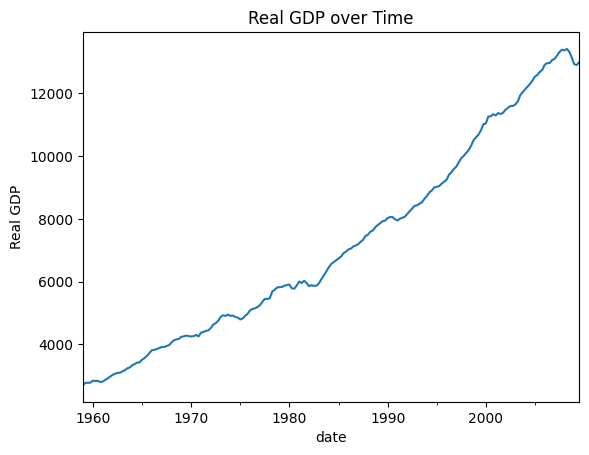

In [32]:
import matplotlib.pyplot as plt

# Plotting GDP over time
data['realgdp'].plot(title='Real GDP over Time')
plt.ylabel('Real GDP')
plt.show()